In [68]:
import sklearn
sklearn.__version__

'0.24.1'

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
moosic = pd.read_csv("../data/df_audio_features_1000.csv")
moosic.set_index(["name", "artist"], inplace=True)

Next I will drop some columns, which have outliers and wouldn't be sufficient for the genres. 

speechiness - in this dataset, doesn't provide correct information. One can see that for several POP songs, it is indicated to be below 0.33 - which most likely represent music and other non-speech-like tracks
duration_ms - not relevant
loudness - not relevant, as some rock and alternatively classical music can have similar loudness and this will end up wrong clustering
key - not relevant
time_signature - indicates number of beats, which can be different for the same genre 

despite having quite high number of outliers, I will keep the instrumentalness, as it provides correct information (out of observations). Same applies for liveness - maybe a good indicator for POP Rock and etc. genres. 

In [71]:
moosic.drop(columns=["duration_ms", "key", "time_signature", "loudness", "speechiness"], inplace=True)

In [72]:
moosic

,,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,
Don't Be Cruel,Elvis Presley,0.6970,0.55000,1,0.856,0.000034,0.0907,0.8440,84.802
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,0.452,0.000009,0.1070,0.5910,127.150
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,1,0.944,0.000079,0.6170,0.2240,114.278
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,1,0.808,0.000000,0.1620,0.7940,88.385
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,1,0.918,0.000000,0.1730,0.4040,76.118
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,1,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,1,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,1,0.951,0.969000,0.0772,0.0344,71.573


In [73]:
columns = ['danceability', 'energy', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

moosic_sample = moosic.filter(columns)
moosic_sample.head(3)

,,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,
Don't Be Cruel,Elvis Presley,0.697,0.550,1,0.856,0.000034,0.0907,0.844,84.802
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,0.452,0.000009,0.1070,0.591,127.150
Smoke Gets In Your Eyes,The Platters,0.290,0.227,1,0.944,0.000079,0.6170,0.224,114.278


In [74]:
from sklearn.preprocessing import MinMaxScaler
moosic_scaled =  MinMaxScaler().fit_transform(moosic_sample)
df_moosic_sample = pd.DataFrame(moosic_scaled)
df_moosic_sample

,0,1,2,3,4,5,6,7
0,0.704777,0.552200,1.0,0.859437,0.000035,0.072592,0.853947,0.224187
1,0.580938,0.247977,1.0,0.453814,0.000009,0.089495,0.591879,0.494567
2,0.254755,0.227896,1.0,0.947791,0.000081,0.618376,0.211726,0.412383
3,0.531181,0.683728,1.0,0.811245,0.000000,0.146531,0.802155,0.247063
4,0.437196,0.167654,1.0,0.921687,0.000000,0.157938,0.398177,0.168742
...,...,...,...,...,...,...,...,...
1382,0.157452,0.069660,1.0,0.920683,0.725888,0.064814,0.047545,0.244005
1383,0.141973,0.101387,1.0,0.858433,0.432487,0.050503,0.016470,0.213537
1384,0.000000,0.000913,1.0,0.954819,0.983756,0.058592,0.015330,0.139723
1385,0.081159,0.020864,1.0,0.886546,0.512690,0.093643,0.040916,0.111222


In [75]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
minmax.fit(moosic_sample)
df_moosic_sample = minmax.transform(moosic_sample)
df_moosic_sample = pd.DataFrame(df_moosic_sample, columns = moosic_sample.columns, index = moosic_sample.index)
df_moosic_sample

,,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,1.0,0.859437,0.000035,0.072592,0.853947,0.224187
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,1.0,0.453814,0.000009,0.089495,0.591879,0.494567
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,1.0,0.947791,0.000081,0.618376,0.211726,0.412383
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,1.0,0.811245,0.000000,0.146531,0.802155,0.247063
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,1.0,0.921687,0.000000,0.157938,0.398177,0.168742
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,1.0,0.920683,0.725888,0.064814,0.047545,0.244005
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,1.0,0.858433,0.432487,0.050503,0.016470,0.213537
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,1.0,0.954819,0.983756,0.058592,0.015330,0.139723


In [76]:
from sklearn.cluster import KMeans
moosic_kmeans = KMeans(n_clusters=6).fit(df_moosic_sample)

In [77]:
centroids = pd.DataFrame(moosic_kmeans.cluster_centers_)
centroids.columns = columns
centroids

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
0,0.295367,0.179605,-5.551115e-16,0.885715,0.590162,0.145067,0.190003,0.343092
1,0.546404,0.728677,1.000000e+00,0.099279,0.072379,0.219345,0.393219,0.498513
2,0.660478,0.681118,4.440892e-16,0.213552,0.047909,0.152131,0.586312,0.467902
3,0.715108,0.649585,1.000000e+00,0.308000,0.023017,0.145240,0.789142,0.428355
4,0.212587,0.151155,1.000000e+00,0.910137,0.837168,0.138666,0.120260,0.344250
5,0.406058,0.260716,1.000000e+00,0.843473,0.038821,0.156572,0.339198,0.367846


## Using inertia

In [78]:
moosic_kmeans.inertia_

311.8578065008198

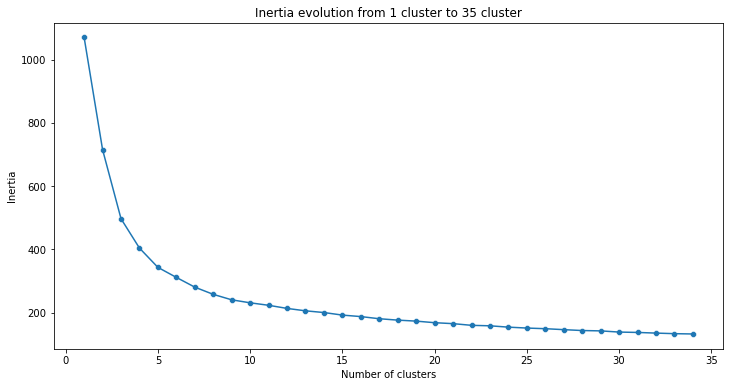

In [79]:
inertia = []

for i in range(1, 35): 
    inertia.append(KMeans(n_clusters=i).fit(df_moosic_sample).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to 35 cluster')
sns.lineplot(x=range(1, 35), y=inertia)
sns.scatterplot(x=range(1, 35), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette Score

In [80]:
from sklearn.metrics import silhouette_score
silhouette_score(df_moosic_sample, moosic_kmeans.labels_)

0.30887286579646256

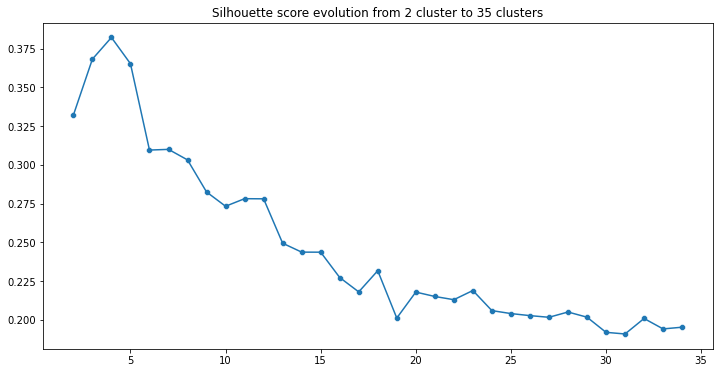

In [81]:
sil_score = []

for i in range(2, 35): 
    labels = KMeans(n_clusters=i).fit(df_moosic_sample).labels_
    sil_score.append(silhouette_score(df_moosic_sample, labels))

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Silhouette score evolution from 2 cluster to 35 clusters')
sns.lineplot(x=range(2, 35), y=sil_score)
sns.scatterplot(x=range(2, 35), y=sil_score)
plt.show()